#  Project 7: Apply Supervised Machine Learning - Simple Linear Regression

Coder: Kareem Young

Project Respoitory: Datafun-07-ml (https://github.com/Keyoungg2/datafun-07-ml)

Project name: young_applied_ML.ipynb

In [2]:
# Imported dependencies for project 
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd 
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

# Charting a Straight Line (Proj.7.1)

Chart a striaght line using  New York City’s 1895–2018 average January high temperatures. Using Pandas we will get data from a CSV file into a datafram. Then use simple linear regression to plot and display chart.

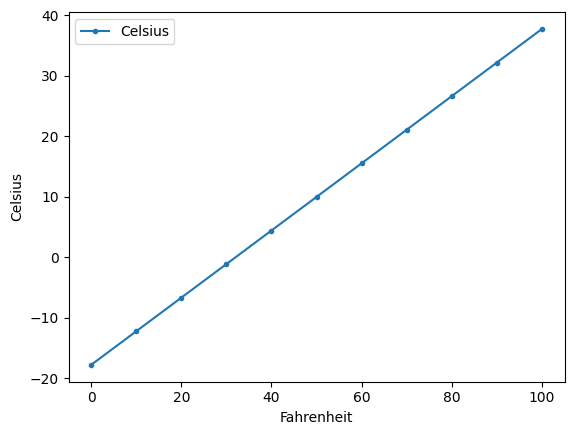

In [3]:
# Finding labeling the slope (y=mx+b) using lambda
c = lambda f: 5/9* (f - 32)

# Storing each Fahrenheit/Celsius pair as a tuple in temps
temps = [(f,c(f)) for f in range(0,101,10)]

# Place data in a DataFrame and  use it to  plot graph. Graph shows the linear relationship between the Fahrenheit and Celsius temperatures
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Predict Avg High Temp in NYC in January (Proj.7.2)
load dataset via Pandas and create a chart for the average NYC hight  temperature from 1895 - 2918 

Section 1 - Data Acquisition

In [7]:
# load data into pandas dataframe
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


Section 2 - Data Inspection

In [9]:
#use dataframe_name.head() to display first 5 rows of dataset
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [10]:
#use dataframe_name.tail() to display last 5 rows of dataset
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


Section 3 - Data Cleaning 

In [11]:
#use dataframe_name.columns [column 1_name, column2_name] to change column names
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
#use df.head to check columns name change successfully
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Clean th date column data since we know this is only for January Month no need to keep 01 in data. This will lead to incorrect plotting. We will only use year only. 

In [18]:
# Get data type by using df.column_name.dtype
nyc_df.Date.dtype

dtype('int64')

In [ ]:
We see the values are data type integers (int64), so we can divide by 100 to truncate the last two digits.

In [20]:
#use floordive mthod to perform division on interger for series
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [22]:
# Setting precision to 2 decimal places
pd.set_option('display.precision', 2)
# Calling describe to calculate basic descriptive statistics
nyc_df['Temperature'].describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Section 5 - Build the Model 

In [24]:
# set slope by using linear_regression to call out axis
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

# linear_regression.slope
linear_regression.slope

0.014771361132966163

In [25]:
# linear_regression.intercept
linear_regression.intercept

8.694993233674289

Section 6- Prediction

In [26]:
# Predicting January 2024's average temperature
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

Section 7 - Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


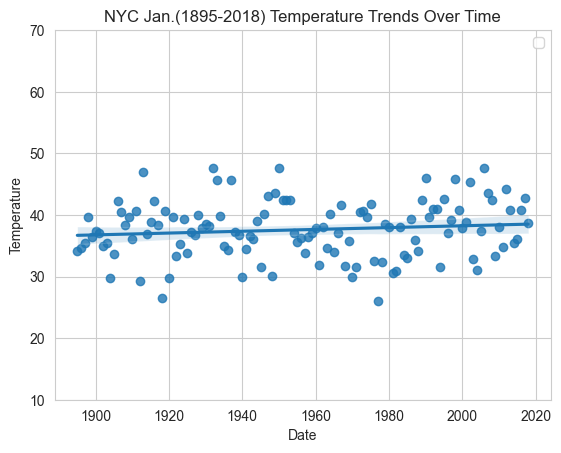

In [30]:
#Use seaborn style whitegrid
sns.set_style('whitegrid')
#Name the graph 
plt.title('NYC Jan.(1895-2018) Temperature Trends Over Time')
#set axis and range
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

#set yaxis range limits
axes.set_ylim(10, 70)

# Show the chart
plt.legend()  # Display the legend with line labels
plt.show()

# Predict Avg High Temp in NYC in January (Proj.7.3)

Section 1: Build model

In [31]:
#Use test_train_split to split the data into parts for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

X_train.shape


(93, 1)

Section 2: Check the shape

In [38]:
#checking the shapes of X_train and X_test
X_test.shape

(31, 1)

Section 3. Train the model

In [39]:
#train the model using Linear Regression Fit
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

Section 4. coef_ and intercept_ attributes

list coeff (slope) and intercept (y intercept)

In [34]:
linear_regression.coef_

array([0.01939167])

In [35]:

linear_regression.intercept_

-0.30779820252656975

Section 5. Test Model

In [42]:
#Test the model using the data in X_test and check  predictions by displaying the predicted and expected values for every fifth element
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


Section 6. Predict

In [41]:
#Use the model to predict the average high temperature in January for the year 2024
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

predict(2024)

array([38.94094855])

Section 7. Visualization

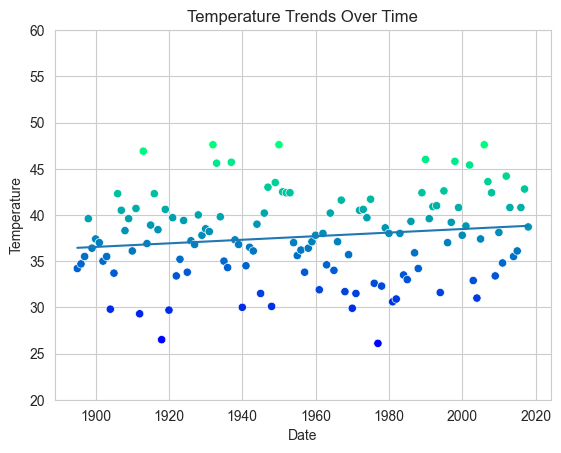

In [44]:
#scatter plot design
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)
#Y axis rangle limits
axes.set_ylim(20, 60)
#Name graph
plt.title('Temperature Trends Over Time')
#Displaying the regression line
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
#array containing corresponding predicted values
y = predict(x)
# Plotting lines based on x and y arrays
line = plt.plot(x, y)

# Methodology Insight Machine Learning vs Simple Linearn Regression (Proj.7.4)

# Coding Insight

Simple Linearn Regression( SLR):

SLR was a simple coding when you look over it. As a novice I feel like this is the simple and can lead plot exactly what is needed. 

Machine Learning (ML):

ML was much more complex as far as coding, but I feel this is in hand due to possiblities that can be done with ML. I feel like with ML you can do much deeper dive into analysis with coding.

Comparison between two methods :
I feel like both SLR and ML are not bad as far as writing code for analysis. You may have to do some few extra steps with ML, but it all depends on what you wish to visualize. 

# Preformance Insight

Simple Linearn Regression( SLR):

SLR as far as proframce go was great. It was able to give out what exactly was asked and was easy to code. I do feel that with SLR preformance overall, it was able to give more insight into when you drill down to specifics using statistical tools.

Machine Learning (ML):

ML did a great job as well with the preformance of trasforming data. I feel like it gives a wider range of predicition with accuracy comparied to SLR due to scikit-learning library. It was able to go more geared to data predicition and possibilties than user friendly due to being more data driven. This also maybe due to adapting to a new skill. 

Comparison between two methods :
I like ML for this due to its ability to predict data and chance of slightly more accurte due to  data exploration that can be more intune with diffent trends that might appear outsite simple linear tread. 

# Visualization Insight:

Simple Linearn Regression(SLR):

I like SLR graphing cause it is simple and easy to understand for readers. It has single color points and regression easily point them out. As with with the control is a little better for  plotted elements. When things are graphs are simple one can know the readers is able to analysis the data quickly. 

Machine Learning (ML):

ML is more detailed with the graphing. If one has a reader that understands graphing and statistics then I feel like this is a go to. It allows for more in depth layering of the data. You can get more specific with coloring and displaying different zones as far as outliers and etc. With ML being more data driven, one gets to see a whole picture of the data instead of just specific details in my opinion

Comparison between two methods:
If you want to make simple easy to read graph than SLR is your way to go cause it is data specific. ML on the otherhad with scikit- learning gives insight into more possiblities and zoning of data leading to more detailed graphs. These visualizations can be more colorful for reader, but can lead to confusion due to data details. Depending on needs should relate which type to use. 

# Personal Favorite: SLR